In [9]:
import pandas as pd
from fastai.vision.all import *
from fastai.torch_basics import *
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from PIL import Image

## Paths may have to be adjusted for in the below cell

In [10]:
data_path = './dataset/train/'
images_path= data_path + 'images/'
test_path = './dataset/test/images/'
csv_path = data_path + 'labels.csv'
submission_file = 'submission.csv'

In [12]:
files = get_image_files(images_path)
df = pd.read_csv(csv_path)

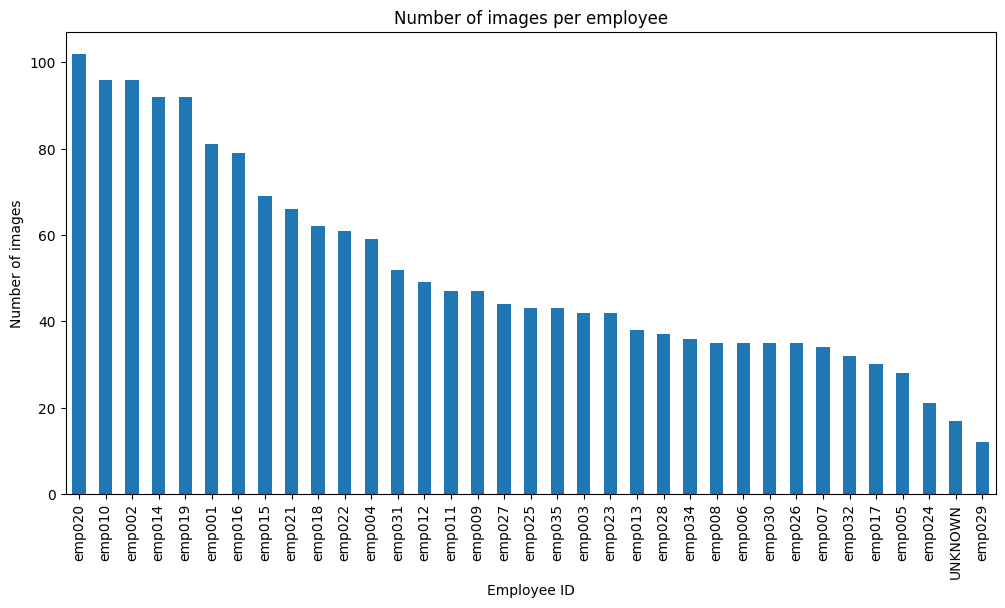

In [14]:
from matplotlib.pyplot import savefig


df['emp_id'].value_counts().plot(kind='bar', figsize=(12, 6), )
plt.title('Number of images per employee')
plt.xlabel('Employee ID')
plt.ylabel('Number of images')

savefig('demo.png', transparent=True)

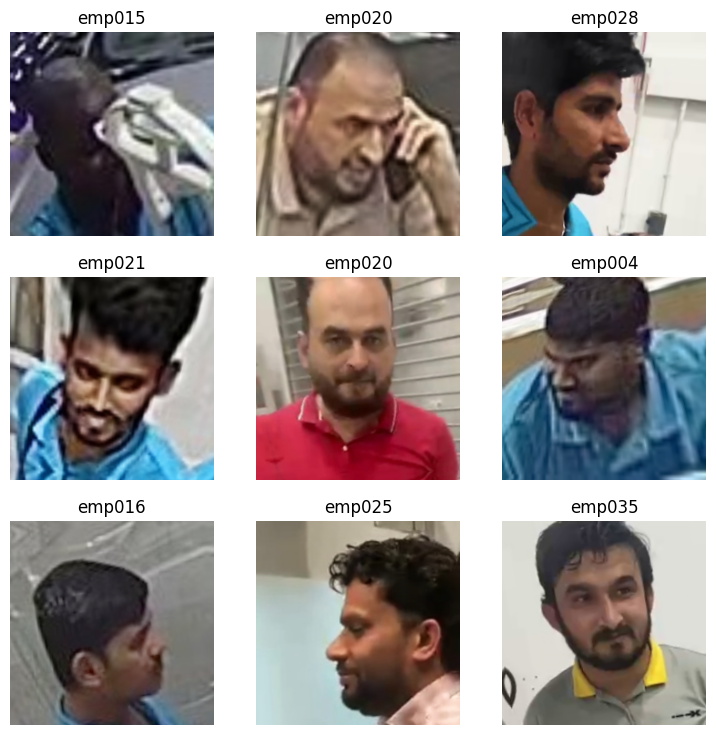

In [15]:
# Create ImageDataLoaders from CSV
dls = ImageDataLoaders.from_csv(
    path=data_path,
    csv_fname='labels.csv',
    folder='images',
    fn_col='filename',
    label_col='emp_id',
    valid_pct=0.2,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=224)
)
# Show batch to verify the data loading
dls.show_batch()

In [16]:
learn = vision_learner(dls, resnet152, metrics=accuracy)
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x767402b73100>
Traceback (most recent call last):
  File "/home/zeroql/webdev/aura-datamind/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py", line 1662, in __del__
    def __del__(self):

KeyboardInterrupt: 


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [7]:
def predict_image(image):
	return learn.predict(test_path+image)[0]
#test_path
results = []

In [8]:
for image in os.listdir(test_path):
	prediction = dict(filename=image, emp_id=predict_image(image))
	results.append(prediction)

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
results_df = pd.DataFrame.from_dict(results)
hi = results_df.drop_duplicates()
hi

In [ ]:
hi.to_csv(submission_file, index=False)